In [21]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load data



In [22]:
# data
data_filepath = '../datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'
data= pd.read_csv(data_filepath)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [24]:
# Preprocess data
X_drop_columns = ['Class', 
                'Category', 
                'svcscan.interactive_process_services', 
                'handles.nport', 
                'modules.nmodules',
                'pslist.nprocs64bit', 
                'callbacks.ngeneric']
X = data.drop(columns=X_drop_columns)
y = data['Category']

In [25]:
total_classes = y.nunique()
print("Total classes: %s"%total_classes)

Total classes: 4


In [26]:
distribution = y.value_counts() 
print(distribution)

Category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64


In [27]:
# Encode string categories to integers
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(y)
print(X)
print(y)

       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0                24             9                1770                 3444   
1                26            11                6889                 7784   
2                19             6               27643                21343   
3                11             5               24478                13129   
4                21             8                6506                17205   
...             ...           ...                 ...                  ...   
58591            16             7                1011                 6567   
58592            16             6                 898                 1315   
58593            17             7                 828                 5315   
58594            16             7                1183                 6574   
58595            17             7                 848                 6001   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandl

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [34]:
# Creating adaboost classifier model 
adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0) 
adb_model = adb.fit(X_train, y_train)
y_pred = adb_model.predict(X_test)
print('Training accuracy:', adb.score(X_train, y_train))
print('Test accuracy:', adb.score(X_test, y_test))

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training accuracy: 0.679500307188204
Test accuracy: 0.6897399139873028


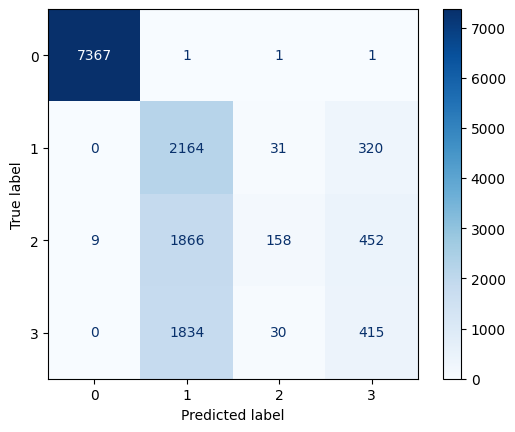

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test are the true labels and predictions are the model predictions
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


**AdaBoost**

AdaBoost (Adaptive Boosting) is a machine learning algorithm that is used for classification tasks. It is an ensemble method that combines multiple weak classifiers to create a strong classifier. 

The AdaBoostClassifier variable in this Jupyter Notebook is of type `sklearn.ensemble._weight_boosting.AdaBoostClassifier`. It has been imported from the `sklearn.ensemble` module.

The `adb` and `adb_model` variables are instances of the AdaBoostClassifier. They have been created with the parameters `learning_rate=1` and `random_state=0`.

The AdaBoostClassifier is trained on the `X_train` and `y_train` data, and used to make predictions on the `X_test` data. The predicted labels are stored in the `y_pred` variable.

To evaluate the performance of the AdaBoostClassifier, the `accuracy_score` function from the `sklearn.metrics` module can be used. It compares the predicted labels (`y_pred`) with the true labels (`y_test`) and returns the accuracy of the classifier.

Overall, AdaBoost is a powerful algorithm for classification tasks, especially when combined with weak classifiers. It can be used to improve the accuracy of predictions and handle complex datasets.